# LAB 1

In [1]:
import numpy as np 
import cv2
from matplotlib.pyplot import imshow

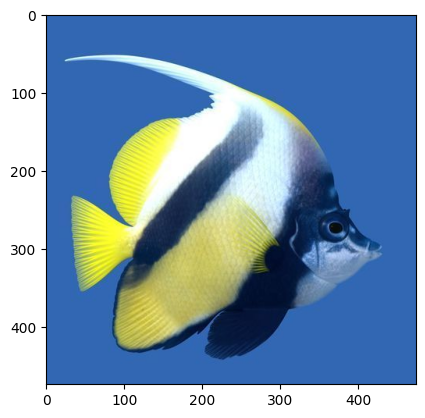

In [2]:
img = cv2.imread("images/fish.jpg")
imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB ))

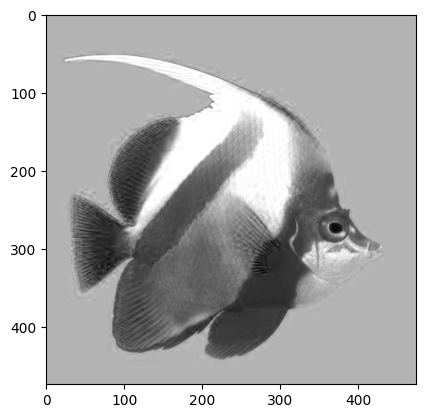

In [3]:
imshow(img[:,:,0], cmap="gray")

## Otsu Threshold

In [4]:
def otsu(hsg):
    p = hsg/np.sum(hsg)
    q1, q2 = np.zeros(256), np.zeros(256)
    m1, m2 = np.zeros(256), np.zeros(256)
    s1, s2 = np.zeros(256), np.zeros(256)
    
    for t in range(0,255):
        t_n = t+1 if t < 255 else 255
        
        for i in range(0, t+1):
            q1[t] += p[i]
        for i in range(t_n, 255):
            q2[t] += p[i]
            
        for i in range(0, t+1):
            m1[t] += ( i*p[i])/(q1[t]+1e-10)
        for i in range(t_n, 255):
            m2[t] += ( i*p[i])/(q2[t]+1e-10)
        
        for i in range(0, t+1):
            s1[t] += np.square(i-m1[t]) * p[i] / (q1[t]+1e-10)
        for i in range(t_n, 255):
            s2[t] += np.square(i-m2[t]) * p[i] / (q2[t]+1e-10)
            
    s_acc = np.zeros(256)        
    s_acc = q1*q2*np.square(m1-m2)
    
    return np.argmax(s_acc) 


In [5]:
def binarize(img, threshold):
    img_bn = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_bn_ref = np.copy(img_bn)
    
    img_bn[img_bn >= threshold] = 255
    img_bn[img_bn < threshold] = 0
    
    res = cv2.cvtColor(img_bn_ref, cv2.COLOR_GRAY2BGR)
    res[:,:,0] = np. maximum(res[:,:,0], img_bn)
    res[:,:,1] = np. minimum(res[:,:,1], 255 - img_bn)
    res[:,:,2] = np. minimum(res[:,:,2], 255 - img_bn) 
    
    return img_bn

In [6]:
def GetImgHsg(img):
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    hsg = np.zeros(256, dtype=np.uint16)
    for y in range(0, img.shape[0]):
        for x in range(0, img.shape[1]):
            hsg[img[y,x]] +=1
            
    return hsg/np.max(hsg)   

C:\Users\BOS\AppData\Local\Temp\ipykernel_14540\3358367567.py:8: RuntimeWarning: overflow encountered in scalar add
  hsg[img[y,x]] +=1


Otsu's threshold : 144


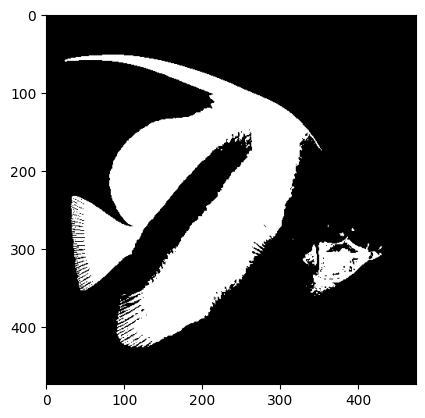

In [7]:
hsg = GetImgHsg(img)

threshold = otsu(hsg)
mask = binarize(img, threshold)
print(f"Otsu's threshold : {threshold}")

imshow(mask, cmap="gray")


In [8]:
final_res = cv2.imread("images/fish.jpg")

for y in range(0, img.shape[0]):
    for x in range(0, img.shape[1]):
        if mask[y,x] == 0:
            final_res[y,x] = 0

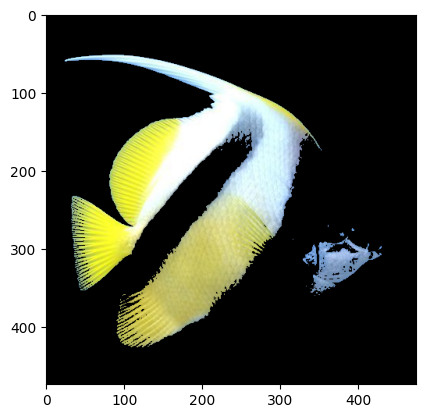

In [9]:
final_res = cv2.cvtColor(final_res, cv2.COLOR_BGR2RGB)
imshow(final_res)